In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data_test = pd.read_csv('c:/Users/Jibin Im/Downloads/titanic/test.csv')
data_train= pd.read_csv('c:/Users/Jibin Im/Downloads/titanic/train.csv')

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


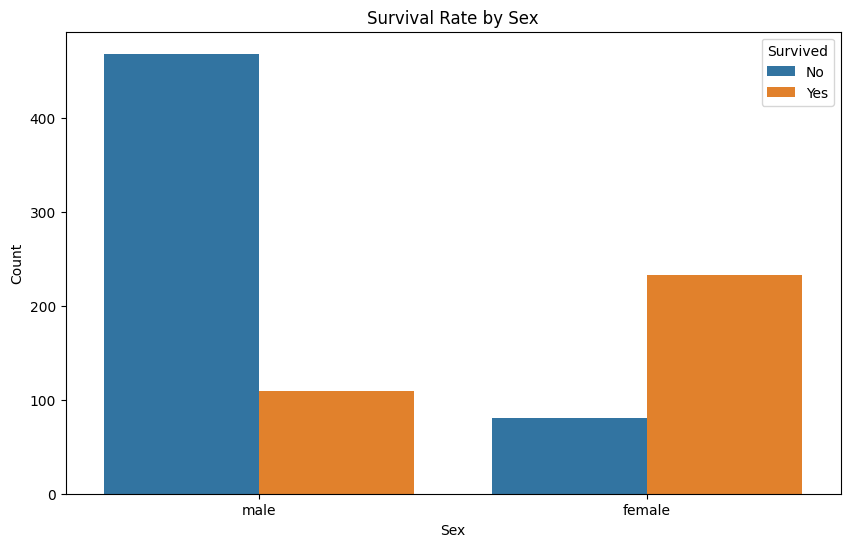

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data_train, x='Sex', hue='Survived')
plt.title('Survival Rate by Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

#seeing the plot, we can probably assume that males will be most likely to not survive compared to the females during our testing.

In [3]:
#change the strings to float

#seeing the plot, we can probably assume that males will be most likely to not survive compared to the females during our testing.

from sklearn.preprocessing import LabelEncoder

def clean(df):
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked']= LabelEncoder().fit_transform(df['Embarked'])
    df['Age'].fillna(df['Age'].median(), inplace=True)# Fill missing Age with the median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)# Fill missing Fare with thye median
    df = df.dropna()
    return df

data_train = clean(data_train)
data_test = clean(data_test)






C:\Users\Jibin Im\AppData\Local\Temp\ipykernel_14676\3621615245.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)# Fill missing Age with the median
C:\Users\Jibin Im\AppData\Local\Temp\ipykernel_14676\3621615245.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("scale", StandardScaler()), # scaling helps no single feature dominates the distance calculations in an algorithm, helping better the algorithm
    ("model", KNeighborsClassifier())# the model for my prediction, the base neighbors it finds is 5
])

mod = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},#check all then_neighbors 1 - 10 #by using pipe.get_params, youll get all the parameters you can tweak
             cv = 3)#cross validation param is 3 
mod.fit(X, y)

NameError: name 'KNeighborsClassifier' is not defined

In [4]:
X = data_train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket','Cabin'])#remove columns that probably wont help with determining whther a passenger survived or not
y = data_train['Survived']# survived column



In [5]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)

clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft',
                        weights=[0.5, 0.5])

In [6]:
clf3.fit(X, y)
pred = clf3.predict(X)

accuracy_score(y, pred)


0.7794117647058824

In [24]:
#now lets tryu it ourselves by adding our own "Person" on the titanic!

def createPerson():
    Pclass = int(input("What class was this person in? (1 - 3): "))
    Sex = int(input("Enter Sex (0 for male, 1 for female): "))
    Age = float(input(f"Enter Age: "))
    Sibsp = int(input(f"Enter Number of Siblings/Spouses Aboard:  "))
    Parch = int(input(f"Enter Number of Parents/Children Aboard: "))
    Fare = float(input(f"Enter Fare: "))
    Embarked = int(input(f"Enter Embarked (0 for C, 1 for Q, 2 for S): "))
    
    return pd.DataFrame({
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [Sibsp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    })

prediction = clf3.predict(createPerson())

print("Your person Survived" if prediction[0] == 1 else "Your person did not Survive")


Your person did not Survive
